In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importation

In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
import math

from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error


#visualisation thingy
import matplotlib.pyplot as plt  
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

#data modeling
import seaborn as seabornInstance 
import statsmodels.api as sm



%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
data=pd.read_csv('/content/drive/My Drive/AE_PJ/statedata.csv')

In [4]:
data.describe()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000,72367.980000,-92.464138,39.410740
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622,88278.006201,16.180787,4.976349
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,1214.000000,-127.250000,27.874400
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000,37317.000000,-104.159500,35.548150
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,56222.000000,-89.900300,39.620750
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000,83233.750000,-78.977850,43.136100
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,589757.000000,-68.980100,49.250000


In [5]:
data.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West




#Problem 1: Data Exploration







We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.

In [6]:
fig = px.line(x=data.x, y=data.y, title='')
fig.show()

In [7]:
data.loc[data['HS.Grad']==data['HS.Grad'].max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
43,1203,4022,0.6,72.9,4.5,67.3,137,82096,UT,84916,-111.33,39.1063,Mountain,Utah,West


In [8]:
data['state.region'].at[data['HS.Grad'].idxmax()]

'West'

In [9]:
fig = px.box(data, y="Murder", x="state.region")
fig.show()

In [10]:
data['state.name'].loc[data['Murder']==10.9]

31    New York
Name: state.name, dtype: object

#Problem 2: Predicting Life Expectancy - An Initial Model

Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you should use the variable "Area" in your model, NOT the variable "state.area".

In [11]:
data.columns

Index(['Population', 'Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad',
       'Frost', 'Area', 'state.abb', 'state.area', 'x', 'y', 'state.division',
       'state.name', 'state.region'],
      dtype='object')

In [12]:
X = data[['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']]
y=data['Life.Exp']

In [13]:
#Let's divide the datased into training and testing sets
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 7), (15, 7), (35,), (15,))

In [15]:
#Let's build our Linear Regressor
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

[ 6.76898203e-05 -1.21091817e-04 -3.26542841e-01 -2.78128889e-01
  2.46309255e-02 -4.83490391e-03  1.29914337e-06]


In [16]:
##Get summary of the linear regression model
from statsmodels.api import OLS
# OLS(y_train,sm.add_constant(X_train)).fit().summary()

mod=sm.OLS(y,X)
res=mod.fit()

print(res.summary()) 

                                 OLS Regression Results                                
Dep. Variable:               Life.Exp   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1641.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                    4.78e-50
Time:                        13:56:35   Log-Likelihood:                         -144.21
No. Observations:                  50   AIC:                                      302.4
Df Residuals:                      43   BIC:                                      315.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
mean_resid = np.sqrt((1/200)*res.ssr)
mean_resp =data["Life.Exp"].mean()
print("Model mse : ",mean_resid)
print("Temp mean:" , mean_resp )
print("ratio(%) : " ,float(100*mean_resid/ mean_resp) )
print("------------------------------")
print("R squared : "  , res.rsquared )


Model mse :  2.1644849176910017
Temp mean: 70.8786
ratio(%) :  3.0537918605771015
------------------------------
R squared :  0.996271052924954


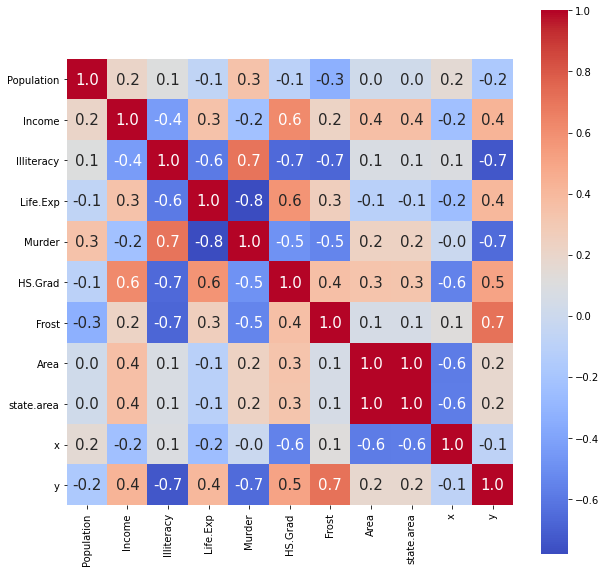

In [18]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap="coolwarm")

#Problem 3: Predicting Life Expectancy - Refining the Model and Analyzing Predictions

In [19]:
X1 =data[['Population', 'Murder', 'HS.Grad', 'Frost']]
y1=data['Life.Exp']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)


In [20]:
y1.shape

(50,)

In [21]:
from statsmodels.api import OLS

#Let's build our Linear Regressor
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)
print(regressor.coef_)

y1_pred_test = regressor.predict(X1_test)

[ 6.80853089e-05 -2.85477957e-01  3.71371387e-02 -3.85013967e-03]


In [22]:
OLS(y1_train,sm.add_constant(X1_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life.Exp   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     18.30
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.04e-07
Time:                        13:56:36   Log-Likelihood:                -35.256
No. Observations:                  35   AIC:                             80.51
Df Residuals:                      30   BIC:                             88.29
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.0413      1.054     67.429      0.000      68.890      73.193
Population  6.809e-05   2.77e-05      2.459      0.020    1.15e-05       0.000
Murder        -0.2855      0.042     -6.762      0.000      -0.372      -0.199
HS.Grad        0.0371      0.017      2.134      0.041       0.002       0.073
Frost         -0.0039      0.003     -1.338      0.191      -0.010       0.002
==============================================================================
Omnibus:                        2.917   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.579
Skew:                          -0.205   Prob(JB):                        0.454
Kurtosis:                       2.044   Cond. No.                     5.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#compare predicted data with real data of the testing set
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred_test})
df1 = df.head()
df1

,Actual,Predicted
41,70.11,69.468030
20,71.83,72.271073
32,69.21,69.364760
43,72.90,71.810461
10,73.60,71.629268


In [24]:
y1_pred = regressor.predict(X1)

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y1_pred, y=data['state.name'],
                    mode='markers',
                    name='Predicted'))
fig.add_trace(go.Scatter(x=y1, y=data['state.name'],
                    mode='markers',
                    name='Actual'))
fig.show()

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y1_pred, y=data['state.region'],
                    mode='markers',
                    name='Predicted'))
fig.add_trace(go.Scatter(x=y1, y=data['state.region'],
                    mode='markers',
                    name='Actual'))
fig.show()

Residual = Observed – Predicted

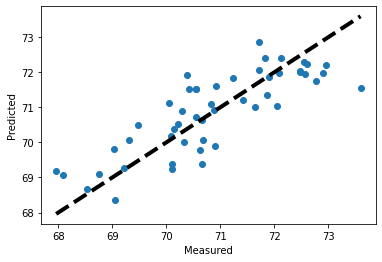

In [34]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
predicted = cross_val_predict(regressor, X1, y1, cv=10)

fig, ax = plt.subplots()
ax.scatter(y1, predicted)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
#Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#main metrics 
SSE = sum((y1_test - y1_pred_test)**2)
SST = sum((y1_test - np.mean(y1_pred_test))**2)
R_squared= 1 - SSE/SST

print(SSE)
print(SST)
print(R_squared)


Mean Absolute Error: 0.6300150481315541
Mean Squared Error: 0.7128559581031505
Root Mean Squared Error: 0.8443079758613858
9.130748327163671
32.48684125563234
0.7189401008452724


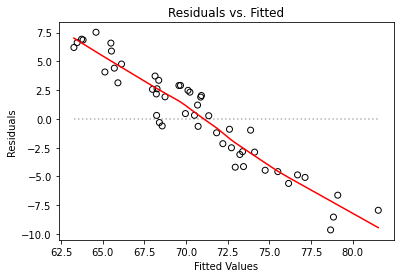

In [31]:
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals = res.resid
fitted = res.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
